# H1B Visa Analysis

## Author: Muskan Vaswan, Arnav Batra

Dataset Description: 
H-1B visas are a category of employment-based, non-immigrant visas for temporary foreign workers in the United States. For a foreign national to apply for H1-B visa, a US employer must offer them a job and submit a petition for a H-1B visa to the US immigration department. This is also the most common visa status applied for and held by international students once they complete college or higher education and begin working in a full-time position.

https://www.kaggle.com/nsharan/h-1b-visa

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 52})

df = pd.read_csv('h1b_kaggle.csv')

In [2]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [3]:
# Columns in data frame
print('\n'.join(list(df.columns)[1:]))

CASE_STATUS
EMPLOYER_NAME
SOC_NAME
JOB_TITLE
FULL_TIME_POSITION
PREVAILING_WAGE
YEAR
WORKSITE
lon
lat


In [4]:
# Number of Rows in the database 
df.shape[0]

3002458

In [5]:
# Variety of case statuses
statuses = df['CASE_STATUS'].value_counts()
statuses

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

<AxesSubplot:>

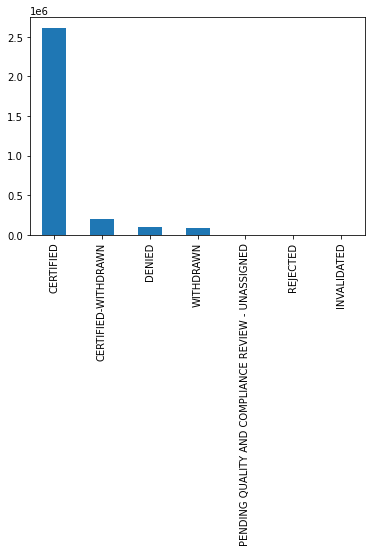

In [6]:
statuses.plot(kind='bar')

In [7]:
df['YEAR'].value_counts()

2016.0    647803
2015.0    618727
2014.0    519427
2013.0    442114
2012.0    415607
2011.0    358767
Name: YEAR, dtype: int64

In [72]:
employers = df['EMPLOYER_NAME'].value_counts()
top_employers = employers[:1200]

In [73]:
sum(employers)

3002399

In [74]:
sum(top_employers)

1512784

In [75]:
# Percentage of applications by top 20 employers

sum(top_employers) / sum(employers) * 100

50.38584145544945

In [79]:
# Percentage of top employers that employers

len(top_employers) / len(employers) * 100

0.5084465686212201

<AxesSubplot:>

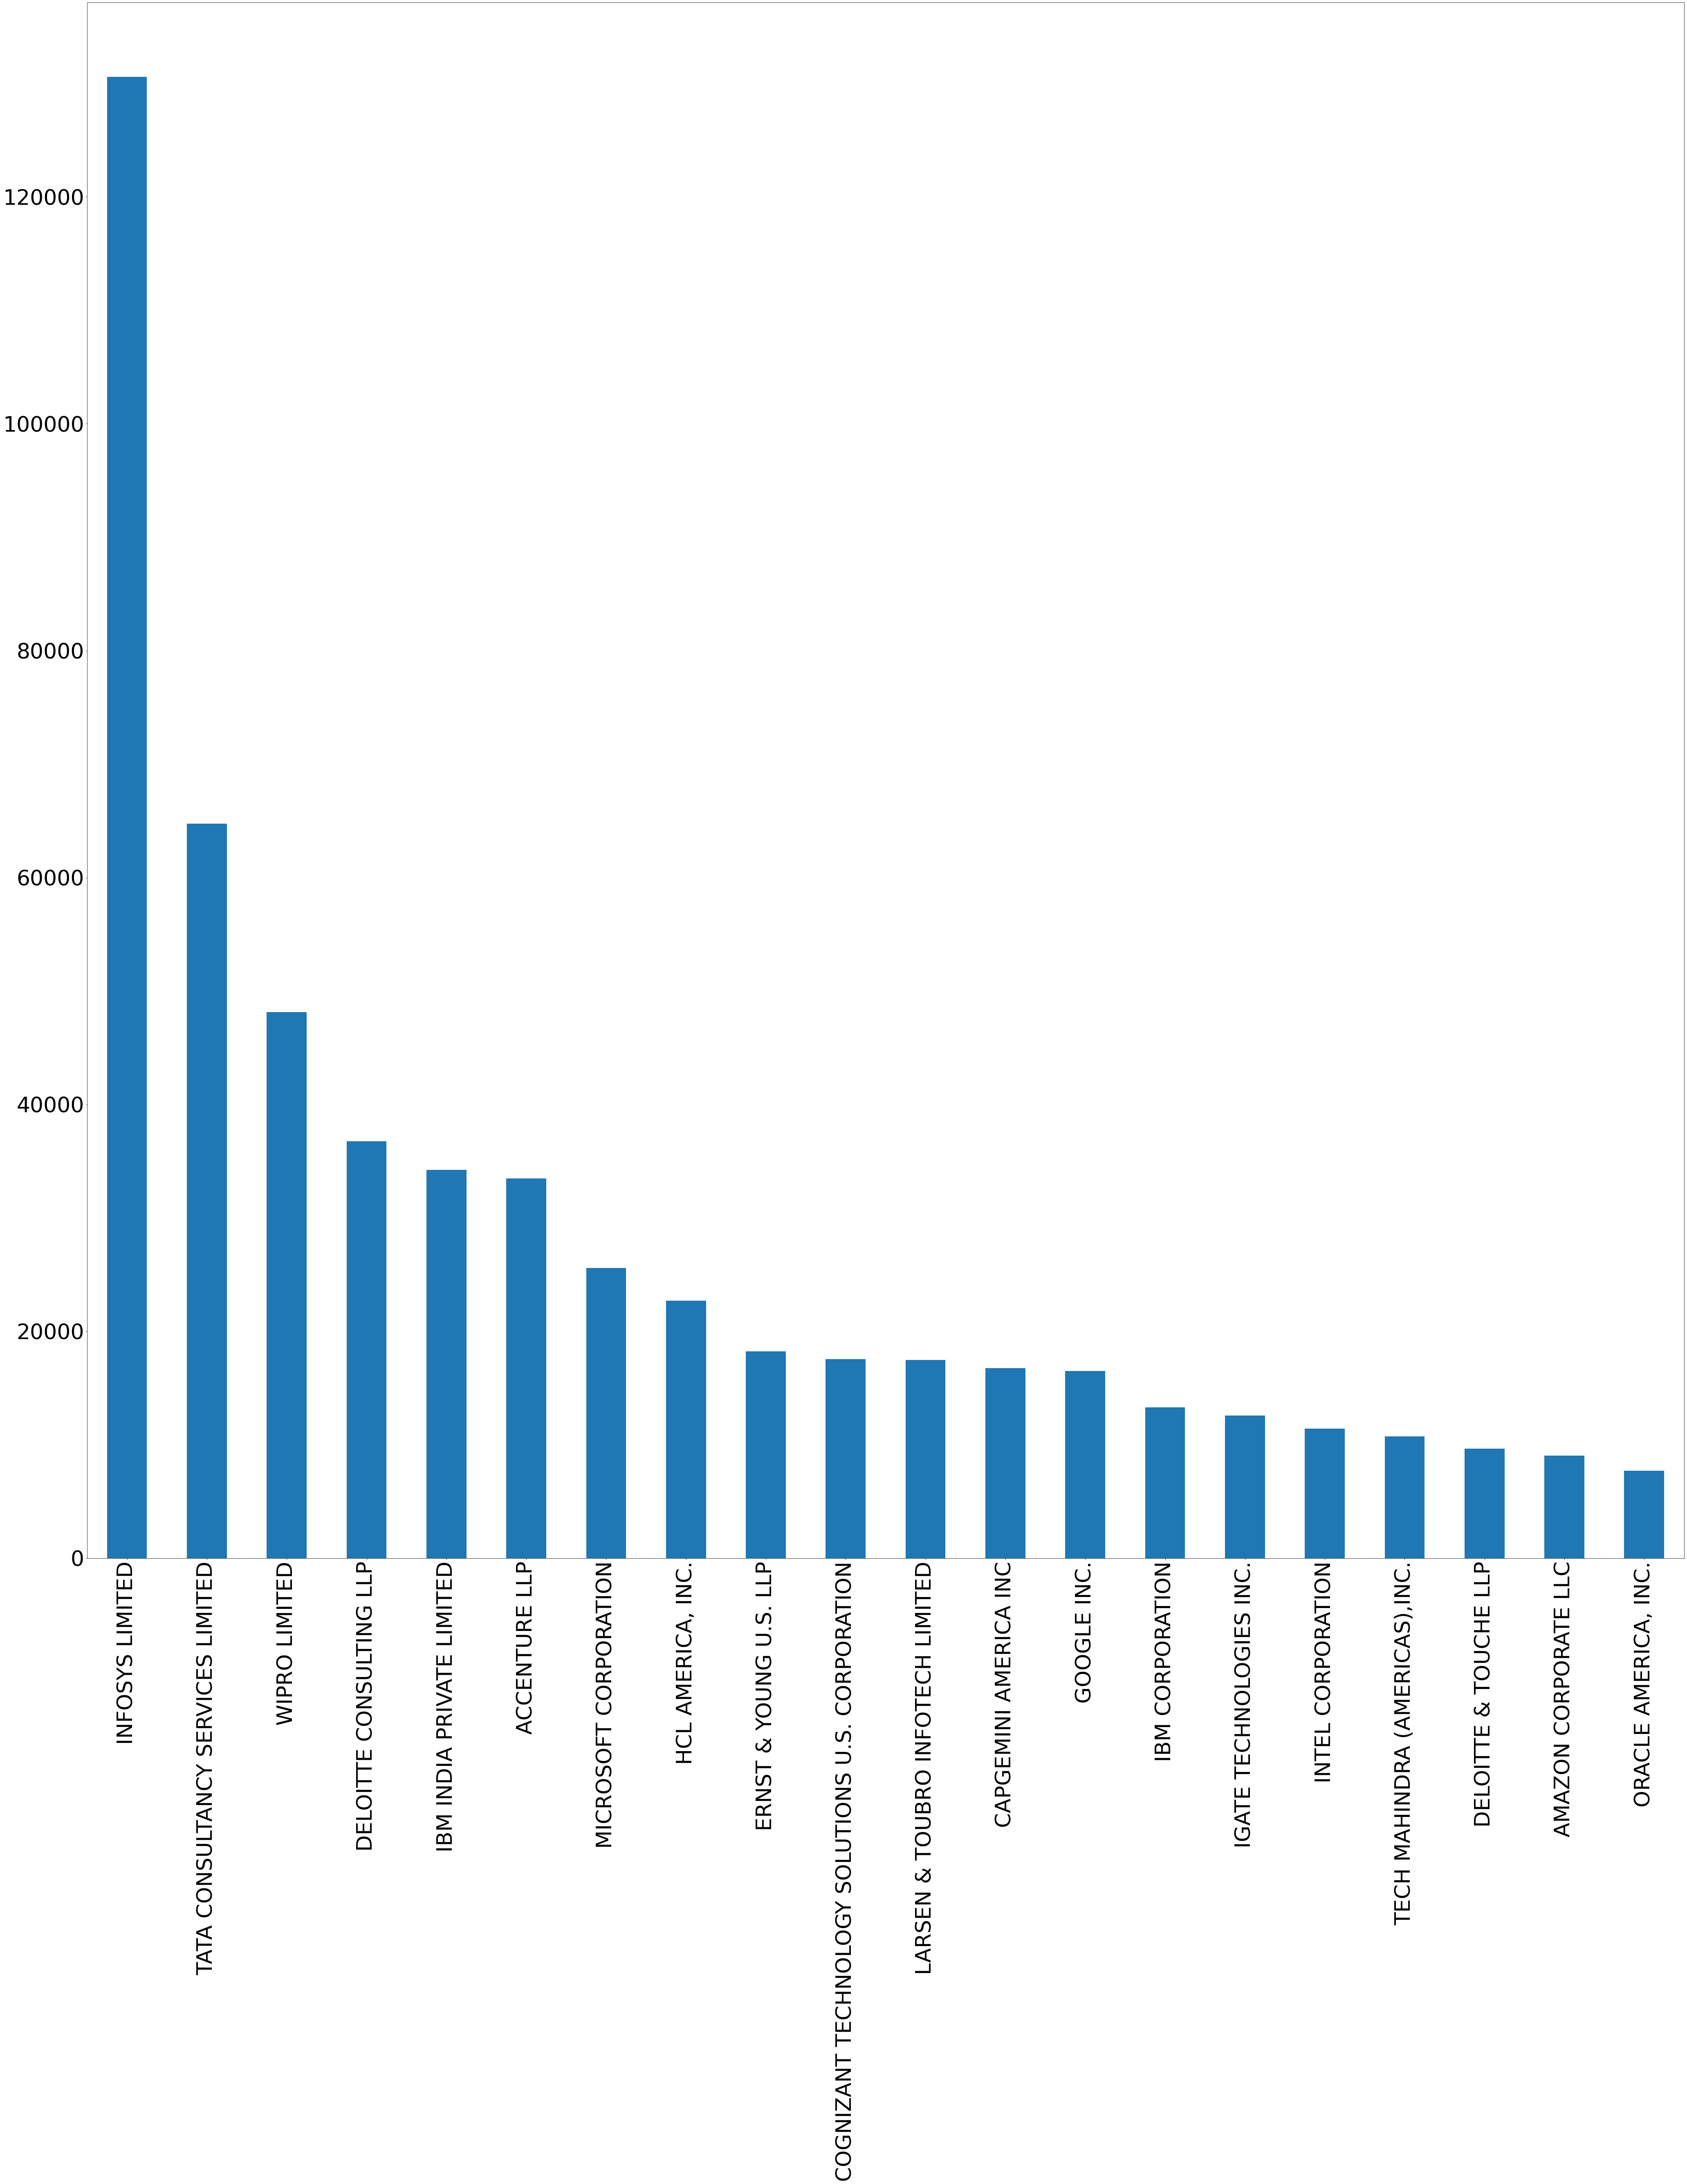

In [33]:
employers.plot(kind='bar', figsize=(70, 70))